Project 3 : Portfolio Optimization using Modern Portfolio Theory (MPT)

1. Import libraries & fetch stock data

In [25]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

stocks = ["HDFCBANK.NS", "INFY.NS", "RELIANCE.NS", "TCS.NS"]
data = yf.download(stocks, start="2020-01-01", end="2025-01-01")['Close']
# Calculate daily returns and drop NaN values
returns = data.pct_change().dropna()

returns

C:\Users\Asus\AppData\Local\Temp\ipykernel_22676\1151104970.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stocks, start="2020-01-01", end="2025-01-01")['Close']
[*********************100%***********************]  4 of 4 completed


Ticker,HDFCBANK.NS,INFY.NS,RELIANCE.NS,TCS.NS
Date,,,,
2020-01-02,0.006374,-0.002918,0.017025,-0.004590
2020-01-03,-0.014261,0.015381,0.001205,0.019929
2020-01-06,-0.021642,-0.009585,-0.023192,-0.000091
2020-01-07,0.015835,-0.014820,0.015385,0.002454
2020-01-08,-0.002618,-0.013326,-0.007510,0.022395
...,...,...,...,...
2024-12-24,-0.001610,-0.007925,0.000368,0.005098
2024-12-26,-0.004088,-0.000864,-0.005071,-0.002488
2024-12-27,0.004188,0.004902,0.003699,-0.001019


2. Calculate portfolio statistics

In [2]:
mean_returns = returns.mean()
cov_matrix = returns.cov()

3. Simulate random portfolios

In [22]:
num_portfolios = 10000
results = np.zeros((3, num_portfolios))
weights_record = []

for i in range(num_portfolios):
    weights = np.random.random(len(stocks))
    weights /= np.sum(weights)
    weights_record.append(weights)
    
    portfolio_return = np.sum(weights * mean_returns) * 252
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix * 252, weights)))
    sharpe_ratio = portfolio_return / portfolio_volatility
    
    results[0, i] = portfolio_volatility
    results[1, i] = portfolio_return
    results[2, i] = sharpe_ratio

max_sr_index = np.argmax(results[2])
max_sr_vol = results[0, max_sr_index]
max_sr_ret = results[1, max_sr_index]
max_sr_sharpe = results[2, max_sr_index]
optimal_weights = weights_record[max_sr_index]


4. Plot Efficient Frontier

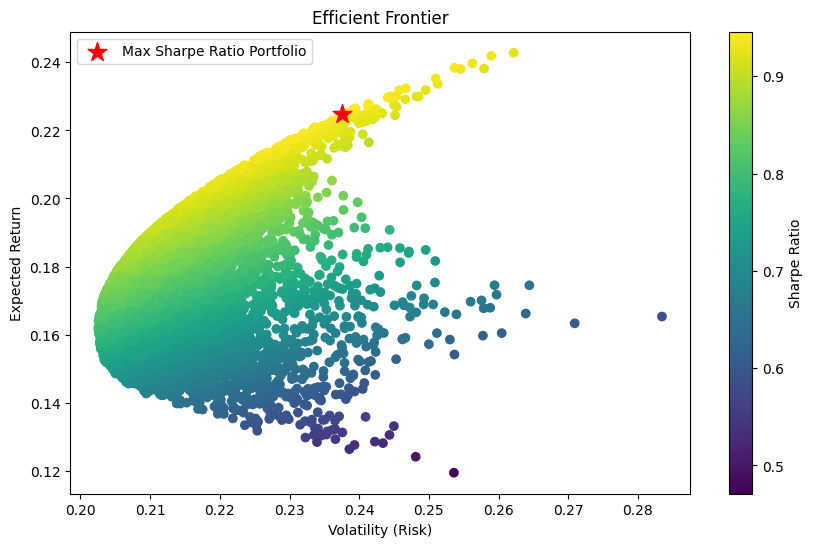

In [21]:
plt.figure(figsize=(10,6))
plt.scatter(results[0], results[1], c=results[2], cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility (Risk)')
plt.ylabel('Expected Return')
plt.title('Efficient Frontier')
plt.scatter(max_sr_vol, max_sr_ret, color='red', marker='*', s=200, label='Max Sharpe Ratio Portfolio')
plt.legend()
plt.show()


5. Find best portfolio

In [10]:
max_sr_index = np.argmax(results[2])
print("Maximum Sharpe Ratio Portfolio:",results[2,max_sr_index])
print("Return:", (results[1,max_sr_index])*100, "%")
print("Volatility:", (results[0,max_sr_index])*100, "%")


Maximum Sharpe Ratio Portfolio: 0.9463820145079749
Return: 22.90892890314623 %
Volatility: 24.206851516569245 %


6. Optimal Portfolio Weights

In [23]:
print("\nOptimal Portfolio Weights:")
for stock, weight in zip(stocks, optimal_weights):
    print(f"{stock}: {weight*100:.2f}%")


Optimal Portfolio Weights:
HDFCBANK.NS: 1.23%
INFY.NS: 69.79%
RELIANCE.NS: 19.33%
TCS.NS: 9.66%
